In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

%matplotlib inline

def series(dots, colr):
    a,b=[],[]
    for i in range(dots):
        a.append(random.randint(1,100))
        b.append(random.randint(1,100))
    plt.scatter(a,b, c=colr)
    return()
#interact(series, dots=(1,100,1), colr=["red","orange","brown"]);
#interactive(series, dots=(1,100,1), colr=["red","orange","brown"]);
interact_manual(series, dots=(1,100,1), colr=["red","orange","brown"]);

interactive(children=(IntSlider(value=50, description='dots', min=1), Dropdown(description='colr', options=('r…

<IPython.core.display.Javascript object>


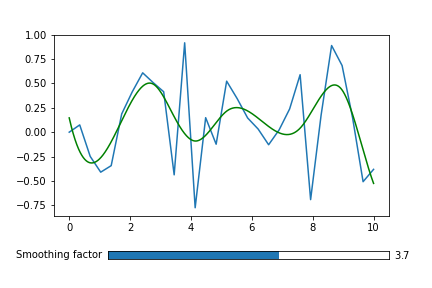

In [3]:
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib notebook
# Initial x and y arrays
x = np.linspace(0, 10, 30)
y = np.sin(0.5*x)*np.sin(x*np.random.randn(30))
# Spline interpolation
spline = UnivariateSpline(x, y, s = 6)
x_spline = np.linspace(0, 10, 1000)
y_spline = spline(x_spline)
# Plotting
fig = plt.figure()
plt.subplots_adjust(bottom=0.25)
ax = fig.subplots()
p = ax.plot(x,y)
p, = ax.plot(x_spline, y_spline, 'g')
# Defining the Slider button
# xposition, yposition, width and height
ax_slide = plt.axes([0.25, 0.1, 0.65, 0.03])
# Properties of the slider
s_factor = Slider(ax_slide, 'Smoothing factor',
                  0.1, 6, valinit=6, valstep=0.2)
# Updating the plot
def update(val):
    current_v = s_factor.val
    spline = UnivariateSpline(x, y, s = current_v)
    p.set_ydata(spline(x_spline))
    #redrawing the figure
    fig.canvas.draw()
    
# Calling the function "update" when the value of the slider is changed
s_factor.on_changed(update)
plt.show()

In [6]:
#https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Events.html

In [4]:
a = widgets.IntSlider()
b = widgets.IntSlider()
c = widgets.IntSlider()
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [30]:
%matplotlib inline
from ipywidgets import interactive, interact_manual
import matplotlib.pyplot as plt
import numpy as np


def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

#interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
#interactive_plot = interact(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
interactive_plot = interact_manual(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
#output = interactive_plot.children[-1]
#output.layout.height = '350px'
#interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

# Gut

In [45]:
%matplotlib inline
from ipywidgets import interact_manual, FloatSlider
import matplotlib.pyplot as plt
import numpy as np


test = widgets.FloatSlider(value=7,min=0,max=10.0,step=0.1,description='$theta$')

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interact_manual(f, m=test, b=(-3, 3, 0.5)) 

interactive(children=(FloatSlider(value=7.0, description='$theta$', max=10.0), FloatSlider(value=0.0, descript…

In [21]:
#import ipywidgets as widgets
from ipywidgets import FloatSlider
from IPython.display import display

a = widgets.IntSlider(value=5, min=0, max=10)

def f1(a):
    display(a)

def f2(a):
    display(a * 2)

out1 = widgets.interactive_output(f1, {'a': a})
out2 = widgets.interactive_output(f2, {'a': a})

display(a)
display(out1)
display(out2)

IntSlider(value=5, max=10)

Output()

Output()

In [20]:
from ipywidgets import FloatSlider
from IPython.display import display
slider = FloatSlider()
display(slider)

test = widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

display(test)

FloatSlider(value=0.0)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0)

In [11]:

caption = widgets.Label(value='The values of range1 and range2 are synchronized')
slider = widgets.IntSlider(min=-5, max=5, value=1, description='Slider')

def handle_slider_change(change):
    caption.value = 'The slider value is ' + (
        'negative' if change.new < 0 else 'nonnegative'
    )

slider.observe(handle_slider_change, names='value')

display(caption, slider)

Label(value='The values of range1 and range2 are synchronized')

IntSlider(value=1, description='Slider', max=5, min=-5)

In [12]:
a = widgets.IntSlider(description="Delayed", continuous_update=False)
b = widgets.IntText(description="Delayed", continuous_update=False)
c = widgets.IntSlider(description="Continuous", continuous_update=True)
d = widgets.IntText(description="Continuous", continuous_update=True)

widgets.link((a, 'value'), (b, 'value'))
widgets.link((a, 'value'), (c, 'value'))
widgets.link((a, 'value'), (d, 'value'))
widgets.VBox([a,b,c,d])

In [27]:
from IPython.display import display
def f(a, b):
    display(a + b)
    return a+b

f(1,2)

w = interactive(f, a=10, b=20)
type(w)

display(w)

3

interactive(children=(IntSlider(value=10, description='a', max=30, min=-10), IntSlider(value=20, description='…